### Construct simulation network

In [1]:
### import packages 
from brian2 import *
from brian2.units import *
from brian2 import ms
from brian2tools import *
import matplotlib.pyplot as plts
import random
import numpy as np
import json

from simulation_runner_syn import run_simulation_with_inh_ext_input, plot_raster, plot_membrane_potentials

### Striatum - GPe - STN - Cortex Simulator

WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]


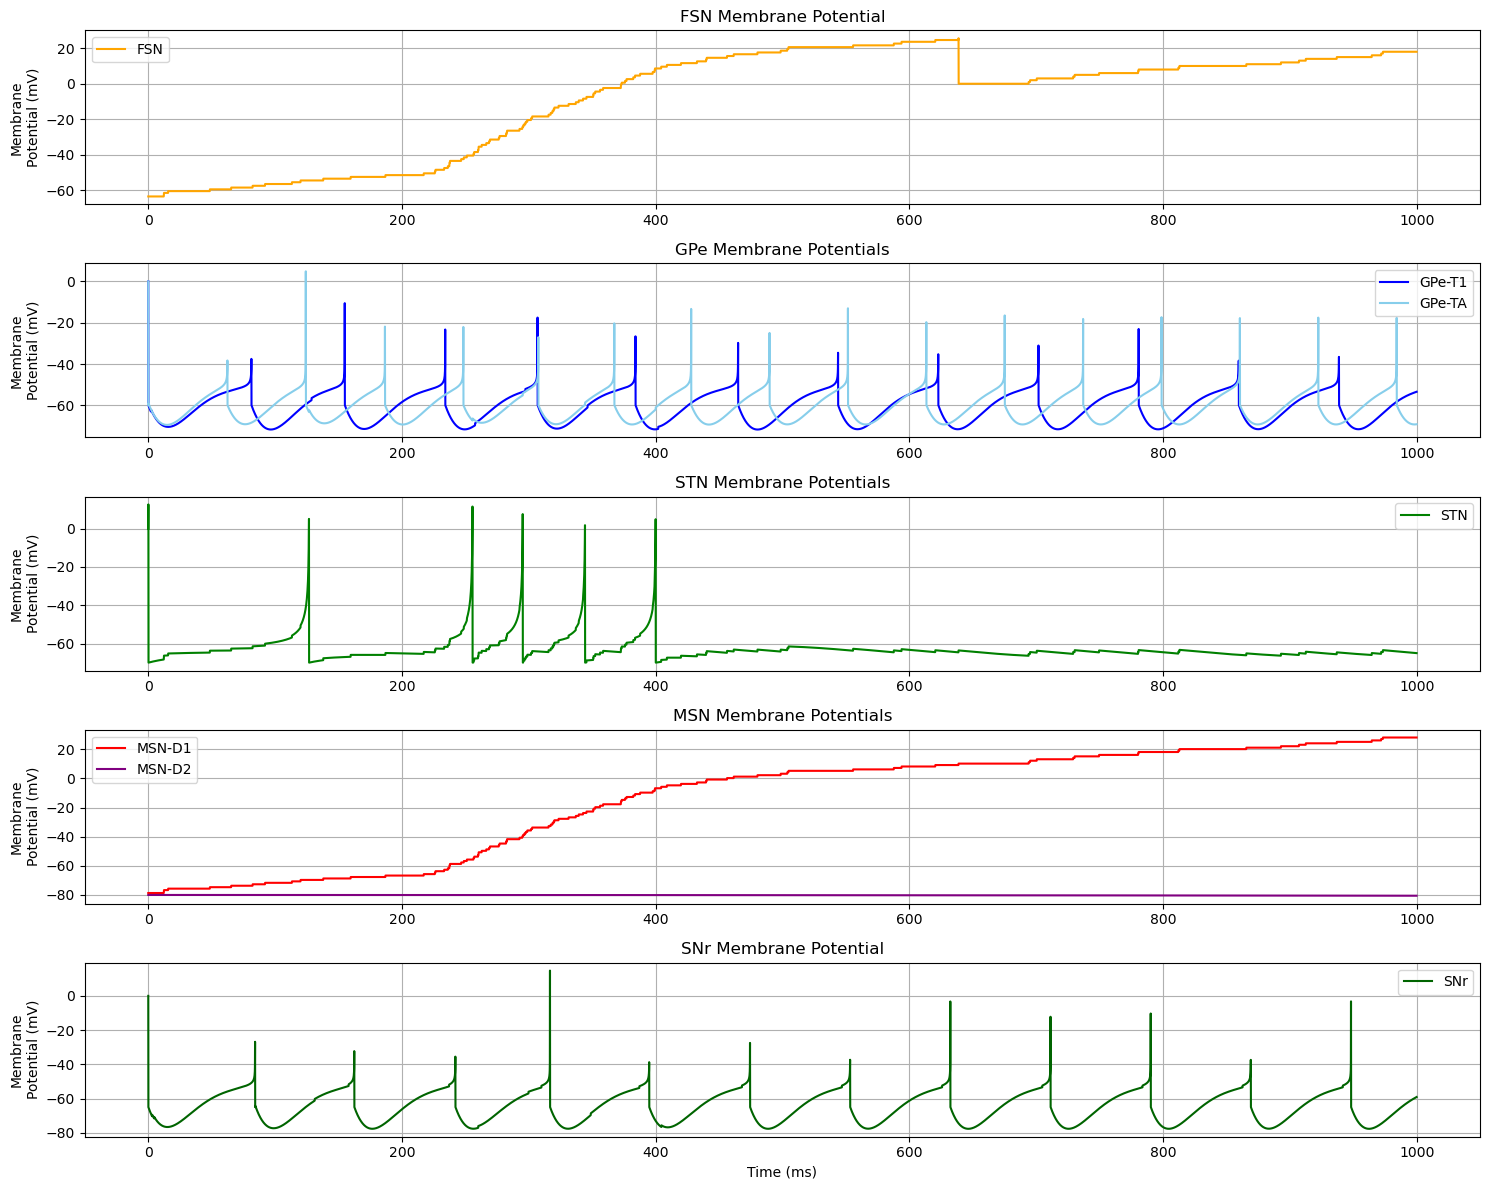

In [4]:
### Result with inh/ext input with neurons (single neuron): 50, 200 - D2 x
fsn_params_file = './params_ref/FSN_1_nor.json'
gpet1_params_file = './params_ref/GPe_T1_1.json'
gpeta_params_file = './params_ref/GPe_TA_1_nor.json'
stn_params_file = './params_ref/STN_1.json'
msnd1_params_file = './params_ref/MSN_D1_1_nor.json' 
msnd2_params_file = './params_ref/MSN_D2_1.json' 
snr_params_file = './params_ref/SNr_1_nor.json' 

synapse_params = {
    # Cortex - FSN
    'csfs_g0_a': 0.5 * nS,
    'csfs_ampa_tau_syn': 12 * ms,
    'csfs_ampa_E_rev': 0 * mV,
    'csfs_delay': 2.5, 

    # Cortex - D1
    'cs1_g0_a': 0.5 * nS,
    'cs1_g0_n': 0.11 * nS,
    'cs1_ampa_tau_syn': 12 * ms,
    'cs1_nmda_tau_syn': 160 * ms,
    'cs1_ampa_E_rev': 0 * mV,
    'cs1_nmda_E_rev': 0 * mV,
    'cs1_delay': 2.5,

    # Cortex - D2
    'cs2_g0_a': 0.5 * nS,
    'cs2_g0_n': 0.019 * nS,
    'cs2_ampa_tau_syn': 12 * ms,
    'cs2_nmda_tau_syn': 160 * ms,
    'cs2_ampa_E_rev': 0 * mV,
    'cs2_nmda_E_rev': 0 * mV,
    'cs2_delay': 2.5,

    # Cortex - STN (excitatory connection)
    'csn_g0_a': 0.25 * nS,
    'csn_g0_n': 0.00625 * nS,
    'csn_ampa_tau_syn': 4 * ms,
    'csn_nmda_tau_syn': 160 * ms,
    'csn_ampa_E_rev': 0 * mV,
    'csn_nmda_E_rev': 0 * mV,
    'csn_delay': 2.5,

    # FSN - FSN
    'fsfs_g0_g': 1*nS,
    'fsfs_gaba_tau_syn': 6*ms,  
    'fsfs_gaba_E_rev': -74*mV,
    'fsfs_delay': 1.7,

    # FSN - D1 
    'fsd1_g0_g': 6*nS,
    'fsd1_gaba_tau_syn': 11*ms,  
    'fsd1_gaba_E_rev': -74*mV,
    'fsd1_delay': 1.7,

    # FSN - D2 
    'fsd2_g0_g': 6*nS,
    'fsd2_gaba_tau_syn': 11*ms,  
    'fsd2_gaba_E_rev': -74*mV,
    'fsd2_delay': 1.7,

    # D1 - SNr
    'd1snr_g0_g': 2*nS,
    'd1snr_gaba_tau_syn': 5.2 * ms,
    'd1snr_gaba_E_rev': -80 * mV,
    'd1snr_delay': 7,

    # D1 - D1 
    'd1d1_g0_g': 0.15*nS,
    'd1d1_gaba_tau_syn': 8 * ms,
    'd1d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,

    # D1 - D2 
    'd1d2_g0_g': 0.375*nS,
    'd1d2_gaba_tau_syn': 8 * ms,
    'd1d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D2
    'd2d2_g0_g': 0.35*nS,
    'd2d2_gaba_tau_syn': 8 * ms,
    'd2d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D1 
    'd2d1_g0_g': 0.45*nS,
    'd2d1_gaba_tau_syn': 8 * ms,
    'd2d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - T1 
    'd2g1_g0_g': 2*nS,
    'd2g1_gaba_tau_syn': 6 * ms,
    'd2g1_gaba_E_rev': -65 * mV,
    'd2g1_delay': 7,

    # STN - T1 (ext)
    'snt1_g0_a': 0.35 * nS,
    'snt1_ampa_tau_syn': 12 * ms,
    'snt1_ampa_E_rev': 0 * mV,
    'snt1_delay': 2,

    # STN - TA # 30% of stn-t1
    'snta_g0_a': 0.11 * nS,
    'snta_ampa_tau_syn': 4 * ms, # 다시 확인 
    'snta_ampa_E_rev': 0 * mV,
    
    # STN - SNr
    'snsnr_g0_a':0.91 * nS,
    'snsnr_ampa_tau_syn': 12 * ms,
    'snsnr_ampa_E_rev':0 * mV,
    'snsnr_delay': 4.5,

    # GPeT1 - FSN
    'g1fs_g0_g': 2*nS,
    'g1fs_gaba_tau_syn': 17 * ms,
    'g1fs_gaba_E_rev': -74 * mV,
    'g1fs_delay': 7,   

    # GPeT1 - STN
    'g1sn_g0_g': 0.08*nS,
    'g1sn_gaba_tau_syn': 8 * ms,
    'g1sn_gaba_E_rev': -84 * mV,
    'g1sn_delay': 1,
    
    # GPeT1 - SNr
    'g1snr_g0_g': 76*nS, 
    'g1snr_gaba_tau_syn': 2.1 * ms, 
    'g1snr_gaba_E_rev': -72 * mV,
    'g1snr_delay': 3,

    # T1 - T1 
    'g1g1_g0_g': 1.3*nS,
    'g1g1_gaba_tau_syn': 5 * ms,
    'g1g1_gaba_E_rev': -65 * mV,
    'g1g1_delay': 1,

    # T1 - TA 
    'g1ga_g0_g': 0.33*nS,
    'g1ga_gaba_tau_syn': 5 * ms,
    'g1ga_gaba_E_rev': -65 * mV,
    'g1ga_delay': 1,

    # TA - T1 
    'gag1_g0_g': 1.3*nS,
    'gag1_gaba_tau_syn': 5 * ms,
    'gag1_gaba_E_rev': -65 * mV,
    'gag1_delay':1,

    # TA - TA 
    'gaga_g0_g': 0.33*nS,
    'gaga_gaba_tau_syn': 5 * ms,
    'gaga_gaba_E_rev': -65 * mV,
    'gaga_delay': 1,

    # TA - FSN 
    'gafs_g0_g': 0.51*nS,
    'gafs_gaba_tau_syn': 66 * ms,
    'gafs_gaba_E_rev': -74 * mV,
    'gafs_delay': 7.0,

    # TA - D1 
    'gad1_g0_g': 0.04*nS,
    'gad1_gaba_tau_syn': 87 * ms,
    'gad1_gaba_E_rev': -74 * mV,
    'gad1_delay': 7.0,

    # TA - D2
    'gad2_g0_g': 0.08*nS,
    'gad2_gaba_tau_syn': 76 * ms,
    'gad2_gaba_E_rev': -74 * mV,
    'gad2_delay': 7.0
}

N_FSN = 1
N_GPe = 1
N_STN = 1
N_MSN = 1
N_SNr = 1

results1 = run_simulation_with_inh_ext_input(
    N_FSN,
    N_GPe,
    N_STN,
    N_MSN,
    N_SNr,
    fsn_params_file, 
    gpet1_params_file,
    gpeta_params_file,
    stn_params_file,
    msnd1_params_file,
    msnd2_params_file,
    snr_params_file, 
    synapse_params,
    "FSN",
    'GPeT1',
    'GPeTA', 
    'STN', 
    'MSND1',
    'MSND2',
    'SNr',
    "GPe_STN_inh_ext_dop"
)

plot_membrane_potentials(results1)

WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]


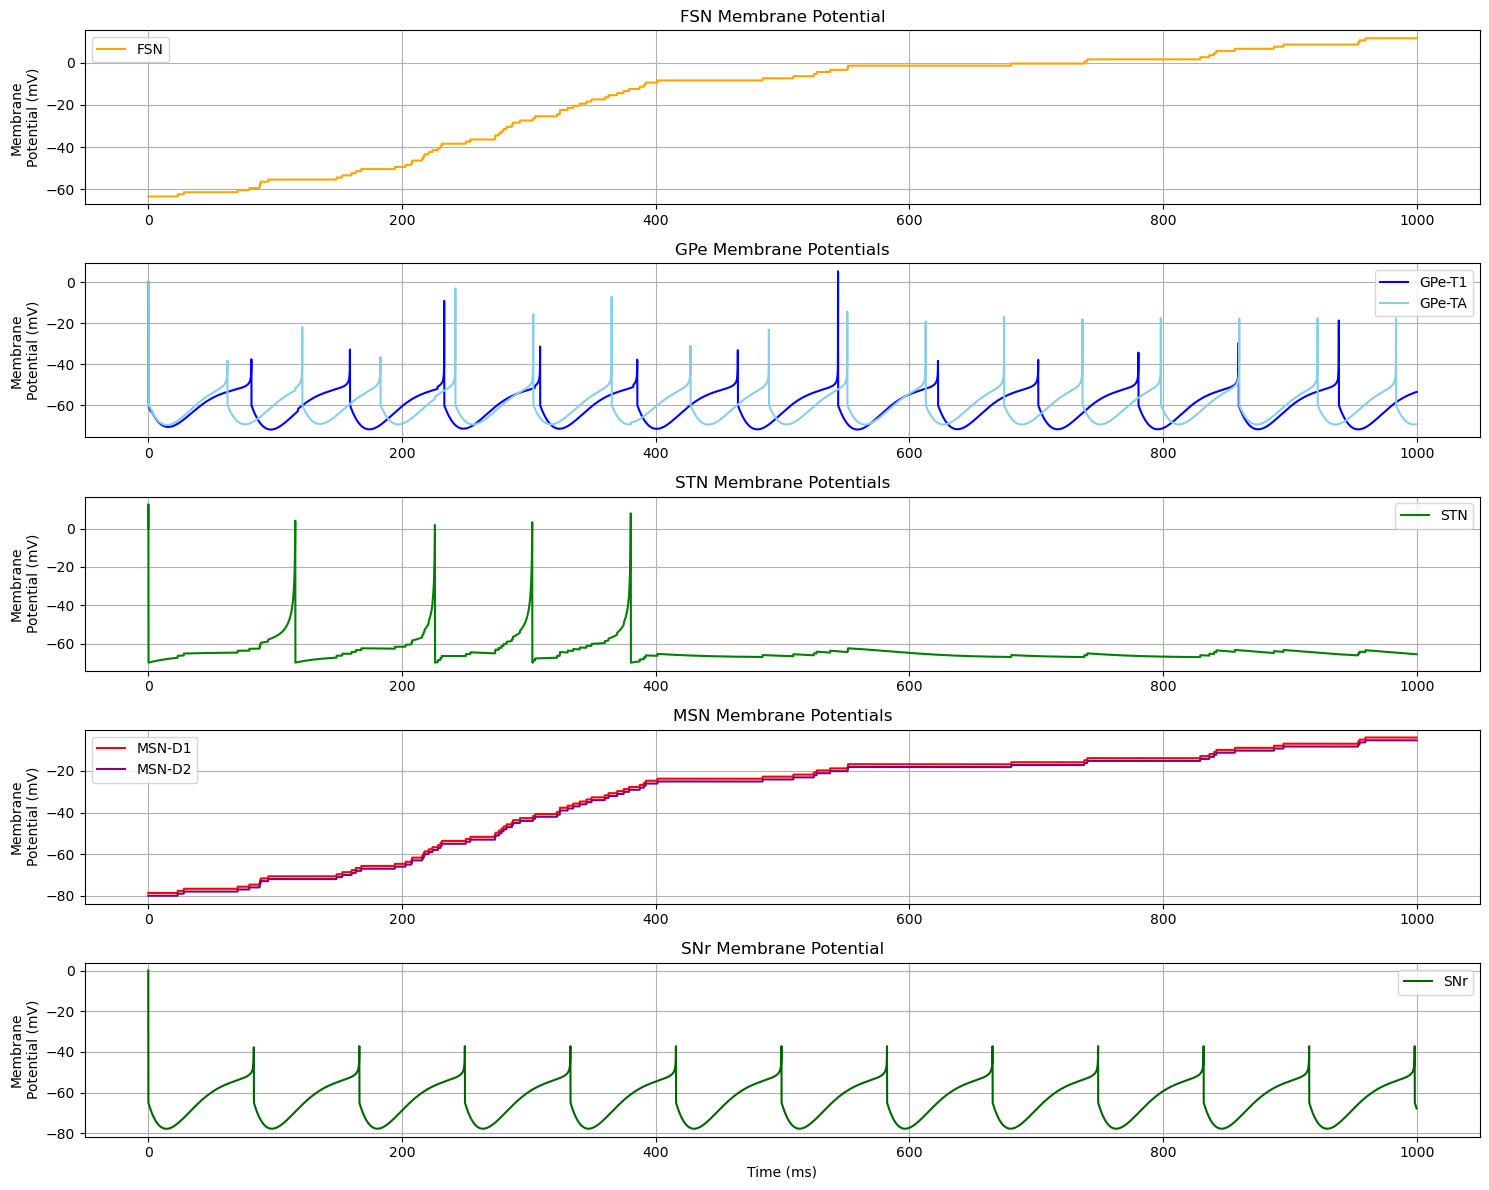

In [11]:
### Result with inh/ext input with neurons (single neuron): 10, 100
fsn_params_file = './params_ref/FSN_1_nor.json'
gpet1_params_file = './params_ref/GPe_T1_1.json'
gpeta_params_file = './params_ref/GPe_TA_1_nor.json'
stn_params_file = './params_ref/STN_1.json'
msnd1_params_file = './params_ref/MSN_D1_1_nor.json' 
msnd2_params_file = './params_ref/MSN_D2_1.json' 
snr_params_file = './params_ref/SNr_1_nor.json' 

synapse_params = {
    # Cortex - FSN
    'csfs_g0_a': 0.5 * nS,
    'csfs_ampa_tau_syn': 12 * ms,
    'csfs_ampa_E_rev': 0 * mV,
    'csfs_delay': 2.5, 

    # Cortex - D1
    'cs1_g0_a': 0.5 * nS,
    'cs1_g0_n': 0.11 * nS,
    'cs1_ampa_tau_syn': 12 * ms,
    'cs1_nmda_tau_syn': 160 * ms,
    'cs1_ampa_E_rev': 0 * mV,
    'cs1_nmda_E_rev': 0 * mV,
    'cs1_delay': 2.5,

    # Cortex - D2
    'cs2_g0_a': 0.5 * nS,
    'cs2_g0_n': 0.019 * nS,
    'cs2_ampa_tau_syn': 12 * ms,
    'cs2_nmda_tau_syn': 160 * ms,
    'cs2_ampa_E_rev': 0 * mV,
    'cs2_nmda_E_rev': 0 * mV,
    'cs2_delay': 2.5,

    # Cortex - STN (excitatory connection)
    'csn_g0_a': 0.25 * nS,
    'csn_g0_n': 0.00625 * nS,
    'csn_ampa_tau_syn': 4 * ms,
    'csn_nmda_tau_syn': 160 * ms,
    'csn_ampa_E_rev': 0 * mV,
    'csn_nmda_E_rev': 0 * mV,
    'csn_delay': 2.5,

    # FSN - FSN
    'fsfs_g0_g': 1*nS,
    'fsfs_gaba_tau_syn': 6*ms,  
    'fsfs_gaba_E_rev': -74*mV,
    'fsfs_delay': 1.7,

    # FSN - D1 
    'fsd1_g0_g': 6*nS,
    'fsd1_gaba_tau_syn': 11*ms,  
    'fsd1_gaba_E_rev': -74*mV,
    'fsd1_delay': 1.7,

    # FSN - D2 
    'fsd2_g0_g': 6*nS,
    'fsd2_gaba_tau_syn': 11*ms,  
    'fsd2_gaba_E_rev': -74*mV,
    'fsd2_delay': 1.7,

    # D1 - SNr
    'd1snr_g0_g': 2*nS,
    'd1snr_gaba_tau_syn': 5.2 * ms,
    'd1snr_gaba_E_rev': -80 * mV,
    'd1snr_delay': 7,

    # D1 - D1 
    'd1d1_g0_g': 0.15*nS,
    'd1d1_gaba_tau_syn': 8 * ms,
    'd1d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,

    # D1 - D2 
    'd1d2_g0_g': 0.375*nS,
    'd1d2_gaba_tau_syn': 8 * ms,
    'd1d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D2
    'd2d2_g0_g': 0.35*nS,
    'd2d2_gaba_tau_syn': 8 * ms,
    'd2d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D1 
    'd2d1_g0_g': 0.45*nS,
    'd2d1_gaba_tau_syn': 8 * ms,
    'd2d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - T1 
    'd2g1_g0_g': 2*nS,
    'd2g1_gaba_tau_syn': 6 * ms,
    'd2g1_gaba_E_rev': -65 * mV,
    'd2g1_delay': 7,

    # STN - T1 (ext)
    'snt1_g0_a': 0.35 * nS,
    'snt1_ampa_tau_syn': 12 * ms,
    'snt1_ampa_E_rev': 0 * mV,
    'snt1_delay': 2,

    # STN - TA # 30% of stn-t1
    'snta_g0_a': 0.11 * nS,
    'snta_ampa_tau_syn': 4 * ms, # 다시 확인 
    'snta_ampa_E_rev': 0 * mV,
    
    # STN - SNr
    'snsnr_g0_a':0.91 * nS,
    'snsnr_ampa_tau_syn': 12 * ms,
    'snsnr_ampa_E_rev':0 * mV,
    'snsnr_delay': 4.5,

    # GPeT1 - FSN
    'g1fs_g0_g': 2*nS,
    'g1fs_gaba_tau_syn': 17 * ms,
    'g1fs_gaba_E_rev': -74 * mV,
    'g1fs_delay': 7,   

    # GPeT1 - STN
    'g1sn_g0_g': 0.08*nS,
    'g1sn_gaba_tau_syn': 8 * ms,
    'g1sn_gaba_E_rev': -84 * mV,
    'g1sn_delay': 1,
    
    # GPeT1 - SNr
    'g1snr_g0_g': 76*nS, 
    'g1snr_gaba_tau_syn': 2.1 * ms, 
    'g1snr_gaba_E_rev': -72 * mV,
    'g1snr_delay': 3,

    # T1 - T1 
    'g1g1_g0_g': 1.3*nS,
    'g1g1_gaba_tau_syn': 5 * ms,
    'g1g1_gaba_E_rev': -65 * mV,
    'g1g1_delay': 1,

    # T1 - TA 
    'g1ga_g0_g': 0.33*nS,
    'g1ga_gaba_tau_syn': 5 * ms,
    'g1ga_gaba_E_rev': -65 * mV,
    'g1ga_delay': 1,

    # TA - T1 
    'gag1_g0_g': 1.3*nS,
    'gag1_gaba_tau_syn': 5 * ms,
    'gag1_gaba_E_rev': -65 * mV,
    'gag1_delay':1,

    # TA - TA 
    'gaga_g0_g': 0.33*nS,
    'gaga_gaba_tau_syn': 5 * ms,
    'gaga_gaba_E_rev': -65 * mV,
    'gaga_delay': 1,

    # TA - FSN 
    'gafs_g0_g': 0.51*nS,
    'gafs_gaba_tau_syn': 66 * ms,
    'gafs_gaba_E_rev': -74 * mV,
    'gafs_delay': 7.0,

    # TA - D1 
    'gad1_g0_g': 0.04*nS,
    'gad1_gaba_tau_syn': 87 * ms,
    'gad1_gaba_E_rev': -74 * mV,
    'gad1_delay': 7.0,

    # TA - D2
    'gad2_g0_g': 0.08*nS,
    'gad2_gaba_tau_syn': 76 * ms,
    'gad2_gaba_E_rev': -74 * mV,
    'gad2_delay': 7.0
}

N_FSN = 1
N_GPe = 1
N_STN = 1
N_MSN = 1
N_SNr = 1

results1 = run_simulation_with_inh_ext_input(
    N_FSN,
    N_GPe,
    N_STN,
    N_MSN,
    N_SNr,
    fsn_params_file, 
    gpet1_params_file,
    gpeta_params_file,
    stn_params_file,
    msnd1_params_file,
    msnd2_params_file,
    snr_params_file, 
    synapse_params,
    "FSN",
    'GPeT1',
    'GPeTA', 
    'STN', 
    'MSND1',
    'MSND2',
    'SNr',
    "GPe_STN_inh_ext_dop"
)

plot_membrane_potentials(results1)

WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]


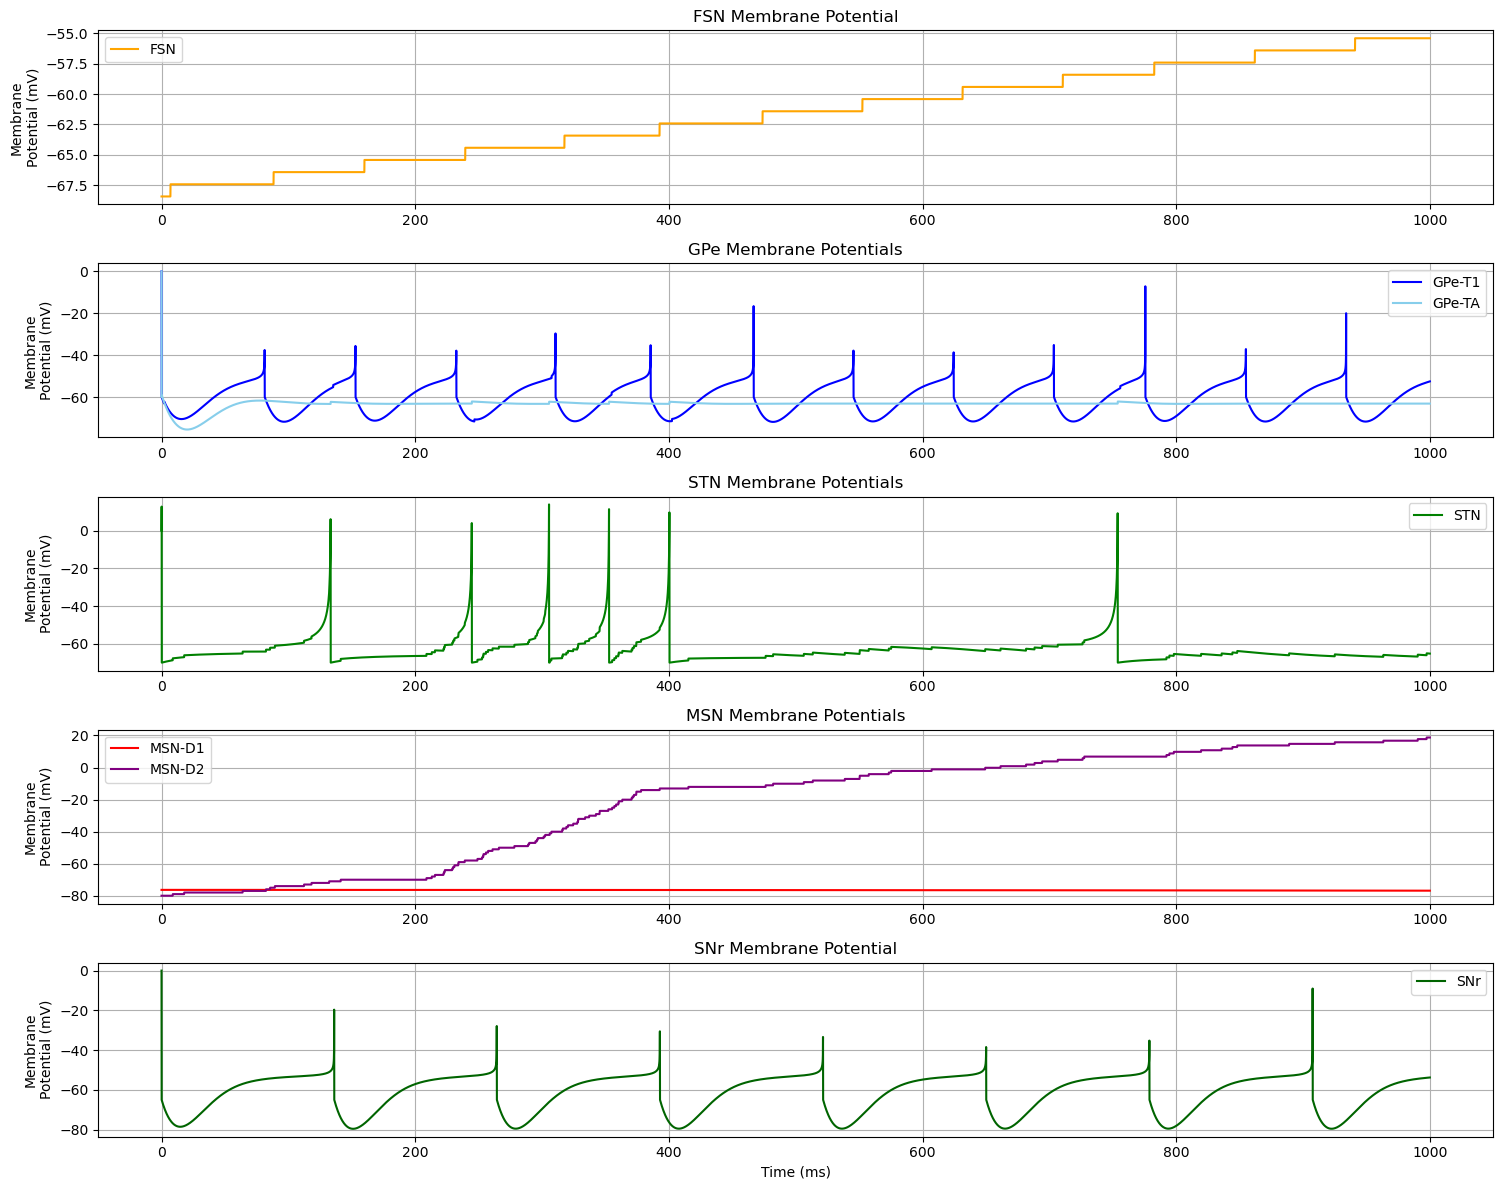

In [3]:
### Result with inh/ext input with neurons (single neuron): 50, 200
fsn_params_file = './params_ref/FSN_1_dop.json'
gpet1_params_file = './params_ref/GPe_T1_1.json'
gpeta_params_file = './params_ref/GPe_TA_1_dop.json'
stn_params_file = './params_ref/STN_1.json'
msnd1_params_file = './params_ref/MSN_D1_1_dop.json' 
msnd2_params_file = './params_ref/MSN_D2_1.json' 
snr_params_file = './params_ref/SNr_1_dop.json' 

synapse_params = {
    # Cortex - FSN
    'csfs_g0_a': 0.5 * nS,
    'csfs_ampa_tau_syn': 12 * ms,
    'csfs_ampa_E_rev': 0 * mV,
    'csfs_delay': 2.5, 

    # Cortex - D1
    'cs1_g0_a': 0.5 * nS,
    'cs1_g0_n': 0.11 * nS,
    'cs1_ampa_tau_syn': 12 * ms,
    'cs1_nmda_tau_syn': 160 * ms,
    'cs1_ampa_E_rev': 0 * mV,
    'cs1_nmda_E_rev': 0 * mV,
    'cs1_delay': 2.5,

    # Cortex - D2
    'cs2_g0_a': 0.5 * nS,
    'cs2_g0_n': 0.019 * nS,
    'cs2_ampa_tau_syn': 12 * ms,
    'cs2_nmda_tau_syn': 160 * ms,
    'cs2_ampa_E_rev': 0 * mV,
    'cs2_nmda_E_rev': 0 * mV,
    'cs2_delay': 2.5,

    # Cortex - STN (excitatory connection)
    'csn_g0_a': 0.25 * nS,
    'csn_g0_n': 0.00625 * nS,
    'csn_ampa_tau_syn': 4 * ms,
    'csn_nmda_tau_syn': 160 * ms,
    'csn_ampa_E_rev': 0 * mV,
    'csn_nmda_E_rev': 0 * mV,
    'csn_delay': 2.5,

    # FSN - FSN
    'fsfs_g0_g': 1*nS,
    'fsfs_gaba_tau_syn': 6*ms,  
    'fsfs_gaba_E_rev': -74*mV,
    'fsfs_delay': 1.7,

    # FSN - D1 
    'fsd1_g0_g': 6*nS,
    'fsd1_gaba_tau_syn': 11*ms,  
    'fsd1_gaba_E_rev': -74*mV,
    'fsd1_delay': 1.7,

    # FSN - D2 
    'fsd2_g0_g': 6*nS,
    'fsd2_gaba_tau_syn': 11*ms,  
    'fsd2_gaba_E_rev': -74*mV,
    'fsd2_delay': 1.7,

    # D1 - SNr
    'd1snr_g0_g': 2*nS,
    'd1snr_gaba_tau_syn': 5.2 * ms,
    'd1snr_gaba_E_rev': -80 * mV,
    'd1snr_delay': 7,

    # D1 - D1 
    'd1d1_g0_g': 0.15*nS,
    'd1d1_gaba_tau_syn': 8 * ms,
    'd1d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,

    # D1 - D2 
    'd1d2_g0_g': 0.375*nS,
    'd1d2_gaba_tau_syn': 8 * ms,
    'd1d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D2
    'd2d2_g0_g': 0.35*nS,
    'd2d2_gaba_tau_syn': 8 * ms,
    'd2d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D1 
    'd2d1_g0_g': 0.45*nS,
    'd2d1_gaba_tau_syn': 8 * ms,
    'd2d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - T1 
    'd2g1_g0_g': 2*nS,
    'd2g1_gaba_tau_syn': 6 * ms,
    'd2g1_gaba_E_rev': -65 * mV,
    'd2g1_delay': 7,

    # STN - T1 (ext)
    'snt1_g0_a': 0.35 * nS,
    'snt1_ampa_tau_syn': 12 * ms,
    'snt1_ampa_E_rev': 0 * mV,
    'snt1_delay': 2,

    # STN - TA # 30% of stn-t1
    'snta_g0_a': 0.11 * nS,
    'snta_ampa_tau_syn': 4 * ms, # 다시 확인 
    'snta_ampa_E_rev': 0 * mV,
    
    # STN - SNr
    'snsnr_g0_a':0.91 * nS,
    'snsnr_ampa_tau_syn': 12 * ms,
    'snsnr_ampa_E_rev':0 * mV,
    'snsnr_delay': 4.5,

    # GPeT1 - FSN
    'g1fs_g0_g': 2*nS,
    'g1fs_gaba_tau_syn': 17 * ms,
    'g1fs_gaba_E_rev': -74 * mV,
    'g1fs_delay': 7,   

    # GPeT1 - STN
    'g1sn_g0_g': 0.08*nS,
    'g1sn_gaba_tau_syn': 8 * ms,
    'g1sn_gaba_E_rev': -84 * mV,
    'g1sn_delay': 1,
    
    # GPeT1 - SNr
    'g1snr_g0_g': 76*nS, 
    'g1snr_gaba_tau_syn': 2.1 * ms, 
    'g1snr_gaba_E_rev': -72 * mV,
    'g1snr_delay': 3,

    # T1 - T1 
    'g1g1_g0_g': 1.3*nS,
    'g1g1_gaba_tau_syn': 5 * ms,
    'g1g1_gaba_E_rev': -65 * mV,
    'g1g1_delay': 1,

    # T1 - TA 
    'g1ga_g0_g': 0.33*nS,
    'g1ga_gaba_tau_syn': 5 * ms,
    'g1ga_gaba_E_rev': -65 * mV,
    'g1ga_delay': 1,

    # TA - T1 
    'gag1_g0_g': 1.3*nS,
    'gag1_gaba_tau_syn': 5 * ms,
    'gag1_gaba_E_rev': -65 * mV,
    'gag1_delay':1,

    # TA - TA 
    'gaga_g0_g': 0.33*nS,
    'gaga_gaba_tau_syn': 5 * ms,
    'gaga_gaba_E_rev': -65 * mV,
    'gaga_delay': 1,

    # TA - FSN 
    'gafs_g0_g': 0.51*nS,
    'gafs_gaba_tau_syn': 66 * ms,
    'gafs_gaba_E_rev': -74 * mV,
    'gafs_delay': 7.0,

    # TA - D1 
    'gad1_g0_g': 0.04*nS,
    'gad1_gaba_tau_syn': 87 * ms,
    'gad1_gaba_E_rev': -74 * mV,
    'gad1_delay': 7.0,

    # TA - D2
    'gad2_g0_g': 0.08*nS,
    'gad2_gaba_tau_syn': 76 * ms,
    'gad2_gaba_E_rev': -74 * mV,
    'gad2_delay': 7.0
}

N_FSN = 1
N_GPe = 1
N_STN = 1
N_MSN = 1
N_SNr = 1

results1 = run_simulation_with_inh_ext_input(
    N_FSN,
    N_GPe,
    N_STN,
    N_MSN,
    N_SNr,
    fsn_params_file, 
    gpet1_params_file,
    gpeta_params_file,
    stn_params_file,
    msnd1_params_file,
    msnd2_params_file,
    snr_params_file, 
    synapse_params,
    "FSN",
    'GPeT1',
    'GPeTA', 
    'STN', 
    'MSND1',
    'MSND2',
    'SNr',
    "GPe_STN_inh_ext_dop"
)

plot_membrane_potentials(results1)

WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
INFO       No numerical integration method specified for group 'synapses_10', using method 'exact' (took 0.01s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_11', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_12', using method 'exact' (took 0.01s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_13', using method 'exact' (took 0.01s). [bria

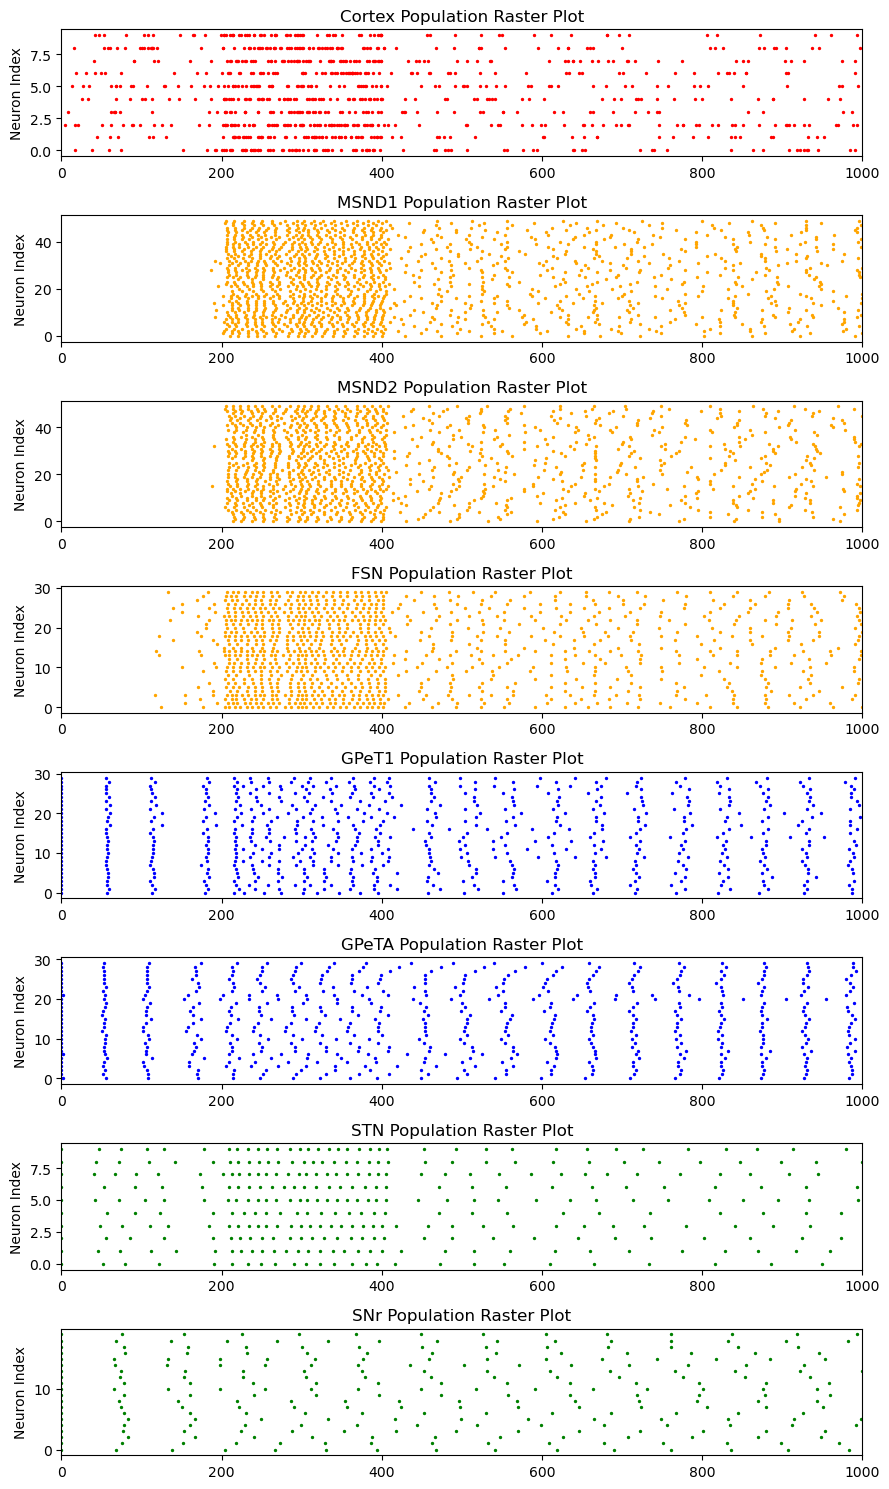

In [5]:
### Result with inh/ext input with neurons (normal) 
fsn_params_file = './params_ref/FSN_1_nor.json'
gpet1_params_file = './params_ref/GPe_T1_1.json'
gpeta_params_file = './params_ref/GPe_TA_1_nor.json'
stn_params_file = './params_ref/STN_1.json'
msnd1_params_file = './params_ref/MSN_D1_1_nor.json' 
msnd2_params_file = './params_ref/MSN_D2_1.json' 
snr_params_file = './params_ref/SNr_1_nor.json' 

synapse_params = {
    # Cortex - FSN
    'csfs_g0_a': 0.5 * nS,
    'csfs_ampa_tau_syn': 12 * ms,
    'csfs_ampa_E_rev': 0 * mV,
    'csfs_delay': 2.5, 

    # Cortex - D1
    'cs1_g0_a': 0.5 * nS,
    'cs1_g0_n': 0.11 * nS,
    'cs1_ampa_tau_syn': 12 * ms,
    'cs1_nmda_tau_syn': 160 * ms,
    'cs1_ampa_E_rev': 0 * mV,
    'cs1_nmda_E_rev': 0 * mV,
    'cs1_delay': 2.5,

    # Cortex - D2
    'cs2_g0_a': 0.5 * nS,
    'cs2_g0_n': 0.019 * nS,
    'cs2_ampa_tau_syn': 12 * ms,
    'cs2_nmda_tau_syn': 160 * ms,
    'cs2_ampa_E_rev': 0 * mV,
    'cs2_nmda_E_rev': 0 * mV,
    'cs2_delay': 2.5,

    # Cortex - STN (excitatory connection)
    'csn_g0_a': 0.25 * nS,
    'csn_g0_n': 0.00625 * nS,
    'csn_ampa_tau_syn': 4 * ms,
    'csn_nmda_tau_syn': 160 * ms,
    'csn_ampa_E_rev': 0 * mV,
    'csn_nmda_E_rev': 0 * mV,
    'csn_delay': 2.5,

    # FSN - FSN
    'fsfs_g0_g': 1*nS,
    'fsfs_gaba_tau_syn': 6*ms,  
    'fsfs_gaba_E_rev': -74*mV,
    'fsfs_delay': 1.7,

    # FSN - D1 
    'fsd1_g0_g': 6*nS,
    'fsd1_gaba_tau_syn': 11*ms,  
    'fsd1_gaba_E_rev': -74*mV,
    'fsd1_delay': 1.7,

    # FSN - D2 
    'fsd2_g0_g': 6*nS,
    'fsd2_gaba_tau_syn': 11*ms,  
    'fsd2_gaba_E_rev': -74*mV,
    'fsd2_delay': 1.7,

    # D1 - SNr
    'd1snr_g0_g': 2*nS,
    'd1snr_gaba_tau_syn': 5.2 * ms,
    'd1snr_gaba_E_rev': -80 * mV,
    'd1snr_delay': 7,

    # D1 - D1 
    'd1d1_g0_g': 0.15*nS,
    'd1d1_gaba_tau_syn': 8 * ms,
    'd1d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,

    # D1 - D2 
    'd1d2_g0_g': 0.375*nS,
    'd1d2_gaba_tau_syn': 8 * ms,
    'd1d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D2
    'd2d2_g0_g': 0.35*nS,
    'd2d2_gaba_tau_syn': 8 * ms,
    'd2d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D1 
    'd2d1_g0_g': 0.45*nS,
    'd2d1_gaba_tau_syn': 8 * ms,
    'd2d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - T1 
    'd2g1_g0_g': 2*nS,
    'd2g1_gaba_tau_syn': 6 * ms,
    'd2g1_gaba_E_rev': -65 * mV,
    'd2g1_delay': 7,

    # STN - T1 (ext)
    'snt1_g0_a': 0.35 * nS,
    'snt1_ampa_tau_syn': 12 * ms,
    'snt1_ampa_E_rev': 0 * mV,
    'snt1_delay': 2,

    # STN - TA # 30% of stn-t1
    'snta_g0_a': 0.11 * nS,
    'snta_ampa_tau_syn': 4 * ms, # 다시 확인 
    'snta_ampa_E_rev': 0 * mV,
    
    # STN - SNr
    'snsnr_g0_a':0.91 * nS,
    'snsnr_ampa_tau_syn': 12 * ms,
    'snsnr_ampa_E_rev':0 * mV,
    'snsnr_delay': 4.5,

    # GPeT1 - FSN
    'g1fs_g0_g': 2*nS,
    'g1fs_gaba_tau_syn': 17 * ms,
    'g1fs_gaba_E_rev': -74 * mV,
    'g1fs_delay': 7,   

    # GPeT1 - STN
    'g1sn_g0_g': 0.08*nS,
    'g1sn_gaba_tau_syn': 8 * ms,
    'g1sn_gaba_E_rev': -84 * mV,
    'g1sn_delay': 1,
    
    # GPeT1 - SNr
    'g1snr_g0_g': 76*nS, 
    'g1snr_gaba_tau_syn': 2.1 * ms, 
    'g1snr_gaba_E_rev': -72 * mV,
    'g1snr_delay': 3,

    # T1 - T1 
    'g1g1_g0_g': 1.3*nS,
    'g1g1_gaba_tau_syn': 5 * ms,
    'g1g1_gaba_E_rev': -65 * mV,
    'g1g1_delay': 1,

    # T1 - TA 
    'g1ga_g0_g': 0.33*nS,
    'g1ga_gaba_tau_syn': 5 * ms,
    'g1ga_gaba_E_rev': -65 * mV,
    'g1ga_delay': 1,

    # TA - T1 
    'gag1_g0_g': 1.3*nS,
    'gag1_gaba_tau_syn': 5 * ms,
    'gag1_gaba_E_rev': -65 * mV,
    'gag1_delay':1,

    # TA - TA 
    'gaga_g0_g': 0.33*nS,
    'gaga_gaba_tau_syn': 5 * ms,
    'gaga_gaba_E_rev': -65 * mV,
    'gaga_delay': 1,

    # TA - FSN 
    'gafs_g0_g': 0.51*nS,
    'gafs_gaba_tau_syn': 66 * ms,
    'gafs_gaba_E_rev': -74 * mV,
    'gafs_delay': 7.0,

    # TA - D1 
    'gad1_g0_g': 0.04*nS,
    'gad1_gaba_tau_syn': 87 * ms,
    'gad1_gaba_E_rev': -74 * mV,
    'gad1_delay': 7.0,

    # TA - D2
    'gad2_g0_g': 0.08*nS,
    'gad2_gaba_tau_syn': 76 * ms,
    'gad2_gaba_E_rev': -74 * mV,
    'gad2_delay': 7.0
}

N_FSN = 30
N_GPe = 30 # 988
N_STN = 10 # 388
N_MSN = 50 # 37971
N_SNr = 20 # 754

results1 = run_simulation_with_inh_ext_input(
    N_FSN,
    N_GPe,
    N_STN,
    N_MSN,
    N_SNr,
    fsn_params_file, 
    gpet1_params_file,
    gpeta_params_file,
    stn_params_file,
    msnd1_params_file,
    msnd2_params_file,
    snr_params_file, 
    synapse_params,
    "FSN",
    'GPeT1',
    'GPeTA', 
    'STN', 
    'MSND1',
    'MSND2',
    'SNr',
    "GPe_STN_inh_ext_dop"
)

plot_raster(results1)

WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
INFO:root:building '_cython_magic_4a890803c091839ec1138a9f38b218f9' extension
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -ftree-vectorize -fPIC -fstack-protector-strong -O2 -pipe -fPIE -isystem /opt/anaconda3/envs/brain/include -D_FORTIFY_SOURCE=2 -isystem /opt/anaconda3/envs/brain/include -I/opt/anaconda3/envs/brain/include -I/opt/anaconda3/envs/brain/lib/python3.9/site-p

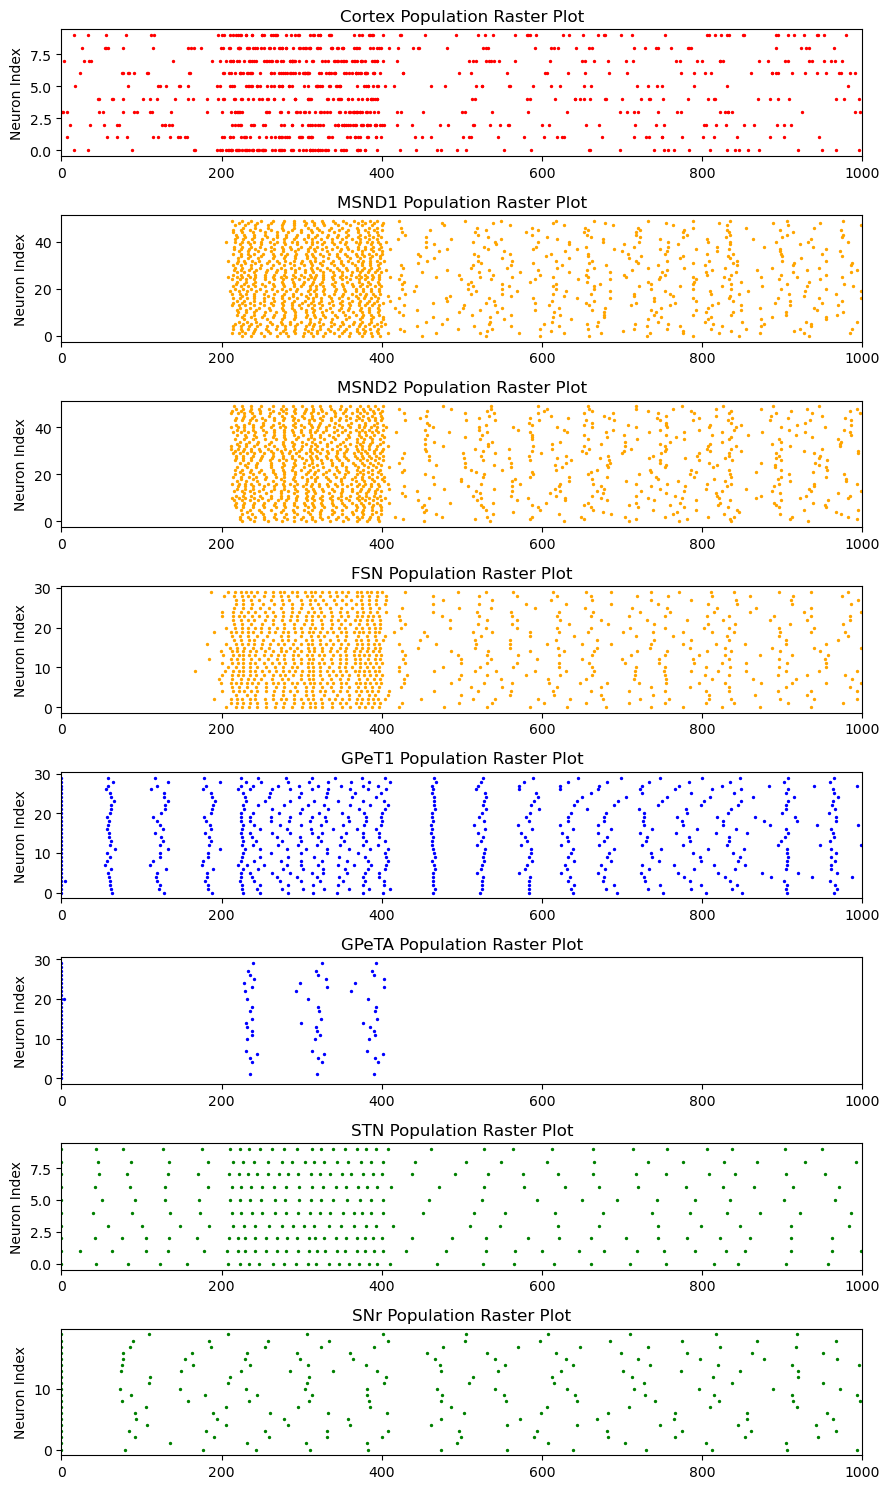

In [7]:
### Result with inh/ext input with neurons (dop) 
from simulation_runner_syn import run_simulation_with_inh_ext_input, plot_raster
from brian2 import *

fsn_params_file = './params_ref/FSN_1_dop.json'
gpet1_params_file = './params_ref/GPe_T1_1.json'
gpeta_params_file = './params_ref/GPe_TA_1_dop.json'
stn_params_file = './params_ref/STN_1.json'
msnd1_params_file = './params_ref/MSN_D1_1_dop.json' 
msnd2_params_file = './params_ref/MSN_D2_1.json' 
snr_params_file = './params_ref/SNr_1_dop.json' 

synapse_params = {
    # Cortex - FSN
    'csfs_g0_a': 0.5 * nS,
    'csfs_ampa_tau_syn': 12 * ms,
    'csfs_ampa_E_rev': 0 * mV,
    'csfs_delay': 2.5, 

    # Cortex - D1
    'cs1_g0_a': 0.5 * nS,
    'cs1_g0_n': 0.11 * nS,
    'cs1_ampa_tau_syn': 12 * ms,
    'cs1_nmda_tau_syn': 160 * ms,
    'cs1_ampa_E_rev': 0 * mV,
    'cs1_nmda_E_rev': 0 * mV,
    'cs1_delay': 2.5,

    # Cortex - D2
    'cs2_g0_a': 0.5 * nS,
    'cs2_g0_n': 0.019 * nS,
    'cs2_ampa_tau_syn': 12 * ms,
    'cs2_nmda_tau_syn': 160 * ms,
    'cs2_ampa_E_rev': 0 * mV,
    'cs2_nmda_E_rev': 0 * mV,
    'cs2_delay': 2.5,

    # Cortex - STN (excitatory connection)
    'csn_g0_a': 0.25 * nS,
    'csn_g0_n': 0.00625 * nS,
    'csn_ampa_tau_syn': 4 * ms,
    'csn_nmda_tau_syn': 160 * ms,
    'csn_ampa_E_rev': 0 * mV,
    'csn_nmda_E_rev': 0 * mV,
    'csn_delay': 2.5,

    # FSN - FSN
    'fsfs_g0_g': 1*nS,
    'fsfs_gaba_tau_syn': 6*ms,  
    'fsfs_gaba_E_rev': -74*mV,
    'fsfs_delay': 1.7,

    # FSN - D1 
    'fsd1_g0_g': 6*nS,
    'fsd1_gaba_tau_syn': 11*ms,  
    'fsd1_gaba_E_rev': -74*mV,
    'fsd1_delay': 1.7,

    # FSN - D2 
    'fsd2_g0_g': 6*nS,
    'fsd2_gaba_tau_syn': 11*ms,  
    'fsd2_gaba_E_rev': -74*mV,
    'fsd2_delay': 1.7,

    # D1 - SNr
    'd1snr_g0_g': 2*nS,
    'd1snr_gaba_tau_syn': 5.2 * ms,
    'd1snr_gaba_E_rev': -80 * mV,
    'd1snr_delay': 7,

    # D1 - D1 
    'd1d1_g0_g': 0.15*nS,
    'd1d1_gaba_tau_syn': 8 * ms,
    'd1d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,

    # D1 - D2 
    'd1d2_g0_g': 0.375*nS,
    'd1d2_gaba_tau_syn': 8 * ms,
    'd1d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D2
    'd2d2_g0_g': 0.35*nS,
    'd2d2_gaba_tau_syn': 8 * ms,
    'd2d2_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - D1 
    'd2d1_g0_g': 0.45*nS,
    'd2d1_gaba_tau_syn': 8 * ms,
    'd2d1_gaba_E_rev': -74 * mV,
    'dd_delay': 1.7,
    
    # D2 - T1 
    'd2g1_g0_g': 2*nS,
    'd2g1_gaba_tau_syn': 6 * ms,
    'd2g1_gaba_E_rev': -65 * mV,
    'd2g1_delay': 7,

    # STN - T1 (ext)
    'snt1_g0_a': 0.35 * nS,
    'snt1_ampa_tau_syn': 12 * ms,
    'snt1_ampa_E_rev': 0 * mV,
    'snt1_delay': 2,

    # STN - TA # 30% of stn-t1
    'snta_g0_a': 0.11 * nS,
    'snta_ampa_tau_syn': 4 * ms, # 다시 확인 
    'snta_ampa_E_rev': 0 * mV,
    
    # STN - SNr
    'snsnr_g0_a':0.91 * nS,
    'snsnr_ampa_tau_syn': 12 * ms,
    'snsnr_ampa_E_rev':0 * mV,
    'snsnr_delay': 4.5,

    # GPeT1 - FSN
    'g1fs_g0_g': 2*nS,
    'g1fs_gaba_tau_syn': 17 * ms,
    'g1fs_gaba_E_rev': -74 * mV,
    'g1fs_delay': 7,   

    # GPeT1 - STN
    'g1sn_g0_g': 0.08*nS,
    'g1sn_gaba_tau_syn': 8 * ms,
    'g1sn_gaba_E_rev': -84 * mV,
    'g1sn_delay': 1,
    
    # GPeT1 - SNr
    'g1snr_g0_g': 76*nS, 
    'g1snr_gaba_tau_syn': 2.1 * ms, 
    'g1snr_gaba_E_rev': -72 * mV,
    'g1snr_delay': 3,

    # T1 - T1 
    'g1g1_g0_g': 1.3*nS,
    'g1g1_gaba_tau_syn': 5 * ms,
    'g1g1_gaba_E_rev': -65 * mV,
    'g1g1_delay': 1,

    # T1 - TA 
    'g1ga_g0_g': 0.33*nS,
    'g1ga_gaba_tau_syn': 5 * ms,
    'g1ga_gaba_E_rev': -65 * mV,
    'g1ga_delay': 1,

    # TA - T1 
    'gag1_g0_g': 1.3*nS,
    'gag1_gaba_tau_syn': 5 * ms,
    'gag1_gaba_E_rev': -65 * mV,
    'gag1_delay':1,

    # TA - TA 
    'gaga_g0_g': 0.33*nS,
    'gaga_gaba_tau_syn': 5 * ms,
    'gaga_gaba_E_rev': -65 * mV,
    'gaga_delay': 1,

    # TA - FSN 
    'gafs_g0_g': 0.51*nS,
    'gafs_gaba_tau_syn': 66 * ms,
    'gafs_gaba_E_rev': -74 * mV,
    'gafs_delay': 7.0,

    # TA - D1 
    'gad1_g0_g': 0.04*nS,
    'gad1_gaba_tau_syn': 87 * ms,
    'gad1_gaba_E_rev': -74 * mV,
    'gad1_delay': 7.0,

    # TA - D2
    'gad2_g0_g': 0.08*nS,
    'gad2_gaba_tau_syn': 76 * ms,
    'gad2_gaba_E_rev': -74 * mV,
    'gad2_delay': 7.0
}

N_FSN = 30
N_GPe = 30 # 988
N_STN = 10 # 388
N_MSN = 50 # 37971
N_SNr = 20 # 754

results2 = run_simulation_with_inh_ext_input(
    N_FSN,
    N_GPe,
    N_STN,
    N_MSN,
    N_SNr,
    fsn_params_file, 
    gpet1_params_file,
    gpeta_params_file,
    stn_params_file,
    msnd1_params_file,
    msnd2_params_file,
    snr_params_file, 
    synapse_params,
    "FSN",
    'GPeT1',
    'GPeTA', 
    'STN', 
    'MSND1',
    'MSND2',
    'SNr',
    "GPe_STN_inh_ext_dop"
)

plot_raster(results2)

WARNING    /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/ipykernel_2357/2686890510.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(neuron_types))  # Use a colormap with different colors
 [py.warnings]


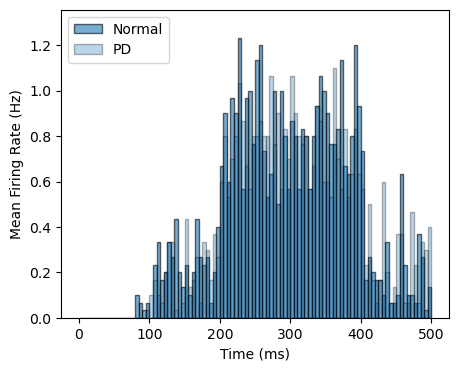

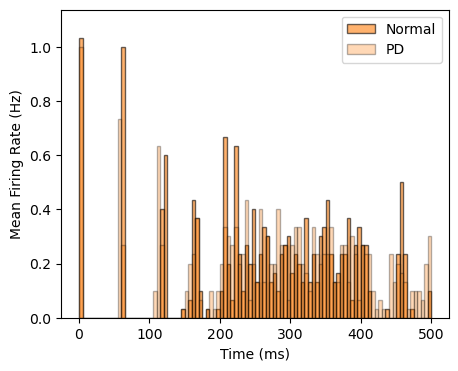

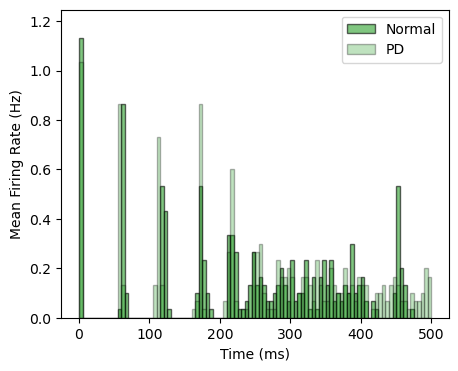

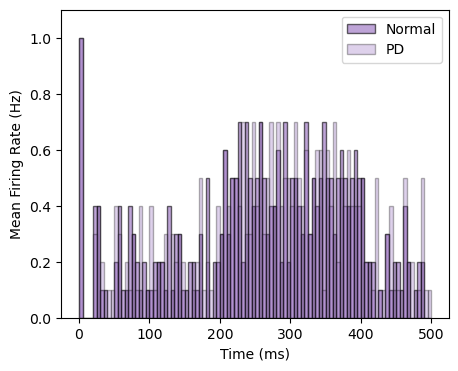

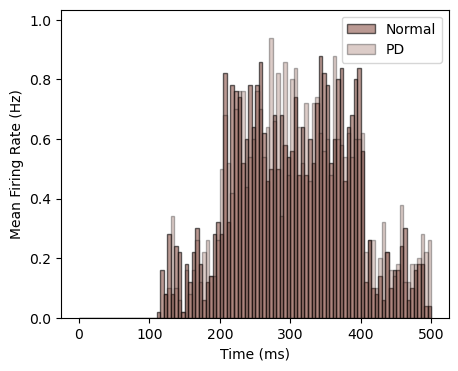

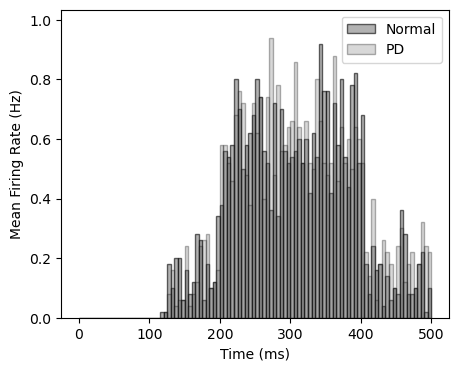

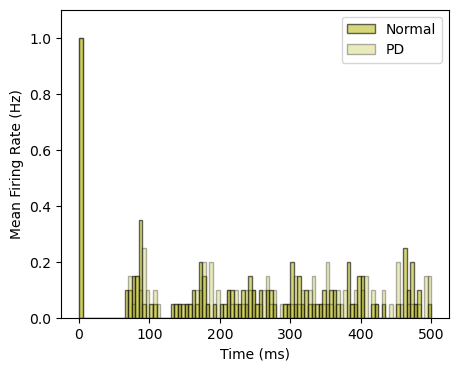

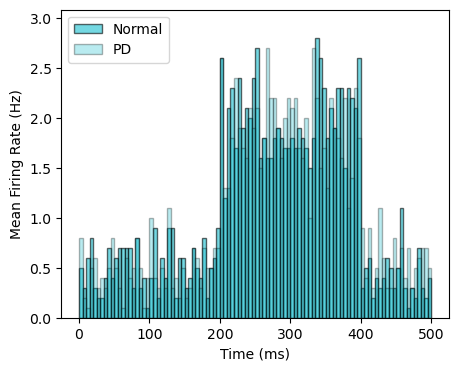

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *

def plot_firing_rate_histogram_comparison(results1, results2, neuron_types, bin_size=5*ms, simulation_time=500*ms):
    """
    Plot and compare histograms of firing rates for each neuron type from two different experiments,
    with a shared y-axis range for each neuron type.
    
    Parameters:
    - results1: Dictionary containing the spike monitors for the first experiment.
    - results2: Dictionary containing the spike monitors for the second experiment.
    - neuron_types: List of neuron types to plot (e.g., ['gpe', 'STN', 'msnd1', 'msnd2', 'snr', 'cortex']).
    - bin_size: Time bin size for calculating firing rates (default: 5 ms).
    - simulation_time: Total time of the simulation (default: 500 ms).
    """
    num_bins = int(simulation_time / bin_size)
    bins = np.linspace(0, float(simulation_time/ms), num_bins + 1)  # Bins in ms
    
    colors = plt.cm.get_cmap('tab10', len(neuron_types))  # Use a colormap with different colors

    # First, calculate the maximum firing rate across both experiments for y-axis scaling
    max_firing_rates = {}
    
    for neuron_type in neuron_types:
        firing_rates_1 = []
        firing_rates_2 = []
        
        # Extract spike times from both results for the current neuron type
        spike_monitor_1 = results1[f'spike_monitor_{neuron_type}']
        spike_monitor_2 = results2[f'spike_monitor_{neuron_type}']
        
        spike_times_1 = spike_monitor_1.t / ms
        spike_times_2 = spike_monitor_2.t / ms
        
        neuron_indices_1 = spike_monitor_1.i
        neuron_indices_2 = spike_monitor_2.i
        
        # Calculate firing rates for each neuron in both experiments
        for neuron_id in np.unique(neuron_indices_1):
            neuron_spike_times_1 = spike_times_1[neuron_indices_1 == neuron_id]
            hist_1, _ = np.histogram(neuron_spike_times_1, bins=bins)
            firing_rates_1.append(hist_1)
        
        for neuron_id in np.unique(neuron_indices_2):
            neuron_spike_times_2 = spike_times_2[neuron_indices_2 == neuron_id]
            hist_2, _ = np.histogram(neuron_spike_times_2, bins=bins)
            firing_rates_2.append(hist_2)
        
        # Mean firing rate for both experiments
        mean_firing_rate_1 = np.mean(firing_rates_1, axis=0)
        mean_firing_rate_2 = np.mean(firing_rates_2, axis=0)
        
        # Find the maximum firing rate across both experiments for this neuron type
        max_firing_rates[neuron_type] = max(np.max(mean_firing_rate_1), np.max(mean_firing_rate_2))
    
    # Now plot the histograms with the same y-axis limit for each neuron type
    for idx, neuron_type in enumerate(neuron_types):
        spike_monitor_1 = results1[f'spike_monitor_{neuron_type}']
        spike_monitor_2 = results2[f'spike_monitor_{neuron_type}']
        
        spike_times_1 = spike_monitor_1.t / ms
        spike_times_2 = spike_monitor_2.t / ms
        
        neuron_indices_1 = spike_monitor_1.i
        neuron_indices_2 = spike_monitor_2.i
        
        firing_rates_1 = []
        firing_rates_2 = []
        
        for neuron_id in np.unique(neuron_indices_1):
            neuron_spike_times_1 = spike_times_1[neuron_indices_1 == neuron_id]
            hist_1, _ = np.histogram(neuron_spike_times_1, bins=bins)
            firing_rates_1.append(hist_1)
        
        for neuron_id in np.unique(neuron_indices_2):
            neuron_spike_times_2 = spike_times_2[neuron_indices_2 == neuron_id]
            hist_2, _ = np.histogram(neuron_spike_times_2, bins=bins)
            firing_rates_2.append(hist_2)
        
        mean_firing_rate_1 = np.mean(firing_rates_1, axis=0)
        mean_firing_rate_2 = np.mean(firing_rates_2, axis=0)
        
        max_y = max_firing_rates[neuron_type]  # Set the y-axis limit to the max firing rate
        
        # Plot the results for both experiments
        plt.figure(figsize=(5, 4))
        
        # Experiment 1
        plt.bar(bins[:-1], mean_firing_rate_1, width=bin_size/ms, align='edge', 
                color=colors(idx), alpha=0.6, label='Normal', edgecolor='black')
        
        # Experiment 2
        plt.bar(bins[:-1], mean_firing_rate_2, width=bin_size/ms, align='edge', 
                color=colors(idx), alpha=0.3, label='PD', edgecolor='black')
        
        plt.ylim(0, max_y * 1.1)  
        
        plt.xlabel('Time (ms)')
        plt.ylabel('Mean Firing Rate (Hz)')
        # plt.title(f'{neuron_type}')
        plt.legend()
        plt.show()

# Example usage:
neuron_types = ['fsn', 'gpet1','gpeta', 'STN', 'msnd1', 'msnd2', 'snr', 'cortex']
plot_firing_rate_histogram_comparison(results1, results2, neuron_types, bin_size=5*ms)

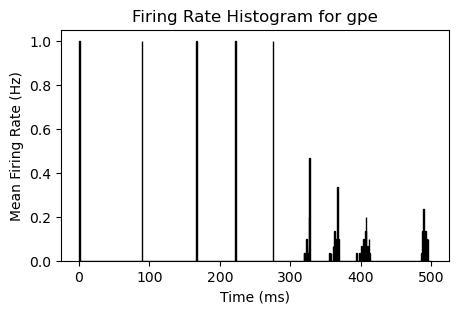

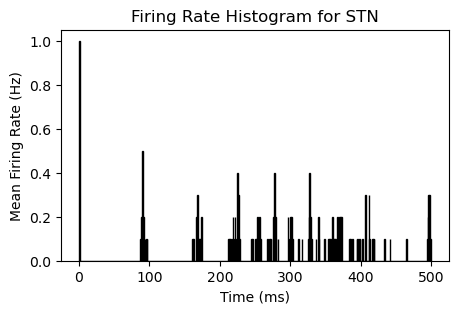

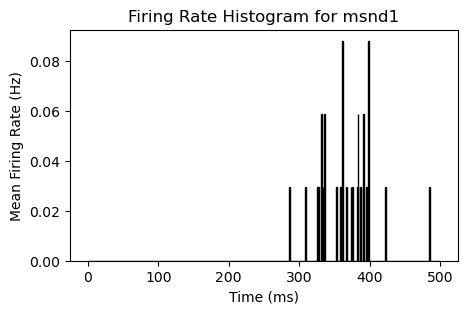

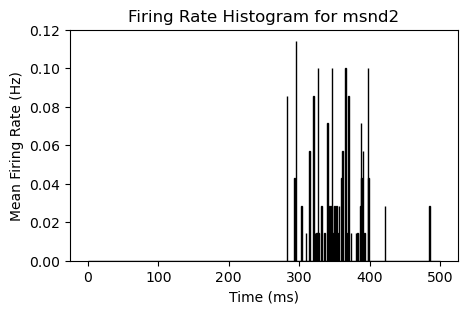

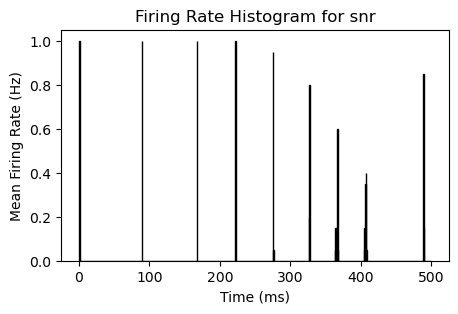

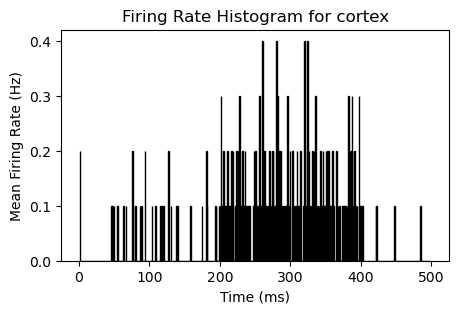

In [11]:
# Dop
import numpy as np
import matplotlib.pyplot as plt

def plot_firing_rate_histogram(results, neuron_types, bin_size=5*ms, simulation_time=500*ms):
    """
    Plot histograms of firing rates for each neuron type from the simulation results.
    
    Parameters:
    - results: Dictionary containing the spike monitors for each neuron type.
    - neuron_types: List of neuron types to plot (e.g., ['gpe', 'STN', 'msnd1', 'msnd2', 'snr', 'cortex']).
    - bin_size: Time bin size for calculating firing rates (default: 5 ms).
    - simulation_time: Total time of the simulation (default: 500 ms).
    """
    num_bins = int(simulation_time / bin_size)
    bins = np.linspace(0, float(simulation_time/ms), num_bins + 1)  # Bins in ms
    
    for neuron_type in neuron_types:
        spike_monitor = results[f'spike_monitor_{neuron_type}']  # Access the spike monitor for each neuron type
        spike_times = spike_monitor.t / ms  # Convert spike times to ms
        neuron_indices = spike_monitor.i  # Get neuron indices that spiked
        firing_rates = []
        
        for neuron_id in np.unique(neuron_indices):
            neuron_spike_times = spike_times[neuron_indices == neuron_id]  # Spike times for individual neuron
            hist, _ = np.histogram(neuron_spike_times, bins=bins)  # Firing rate for each bin
            firing_rates.append(hist)
        
        mean_firing_rate = np.mean(firing_rates, axis=0)  # Mean firing rate across neurons
        
        # Plot histogram of firing rates
        plt.figure(figsize=(5, 3))
        plt.bar(bins[:-1], mean_firing_rate, width=bin_size/ms, align='edge', edgecolor='black')
        plt.xlabel('Time (ms)')
        plt.ylabel('Mean Firing Rate (Hz)')
        plt.title(f'Firing Rate Histogram for {neuron_type}')
        plt.show()

# Example usage:
neuron_types = ['gpe', 'STN', 'msnd1', 'msnd2', 'snr', 'cortex']
plot_firing_rate_histogram(results, neuron_types, bin_size=1*ms)

### Input Implementation Visualization

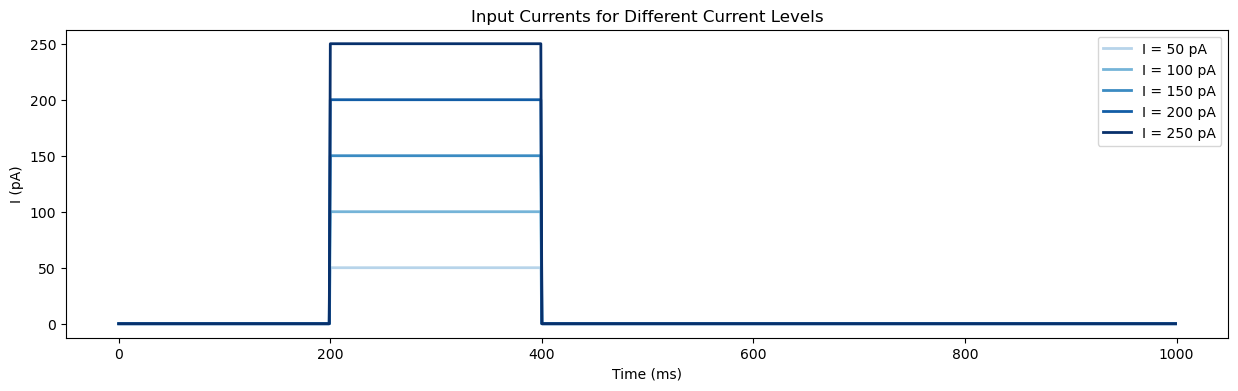

In [12]:
### various input current visualization (various I)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import colormap module

# Time vector from 0 to 1000 ms
time = np.arange(0, 1000, 1)

# Initialize current arrays for each step
current_50 = np.zeros_like(time)
current_100 = np.zeros_like(time)
current_150 = np.zeros_like(time)
current_200 = np.zeros_like(time)
current_250 = np.zeros_like(time)

# Set current values between 200 ms and 400 ms for each current step
current_50[200:400] = 50
current_100[200:400] = 100
current_150[200:400] = 150
current_200[200:400] = 200
current_250[200:400] = 250

colors = cm.Blues(np.linspace(0.3, 1, 5))
# Create the plot
plt.figure(figsize=(15, 4))

# Plot each current with a different label and line style
plt.plot(time, current_50, label='I = 50 pA', linewidth=2, color=colors[0])
plt.plot(time, current_100, label='I = 100 pA', linewidth=2, color=colors[1])
plt.plot(time, current_150, label='I = 150 pA', linewidth=2, color=colors[2])
plt.plot(time, current_200, label='I = 200 pA', linewidth=2, color=colors[3])
plt.plot(time, current_250, label='I = 250 pA', linewidth=2, color=colors[4])

plt.xlabel('Time (ms)')
plt.ylabel('I (pA)')
plt.title('Input Currents for Different Current Levels')
plt.legend()

plt.show()

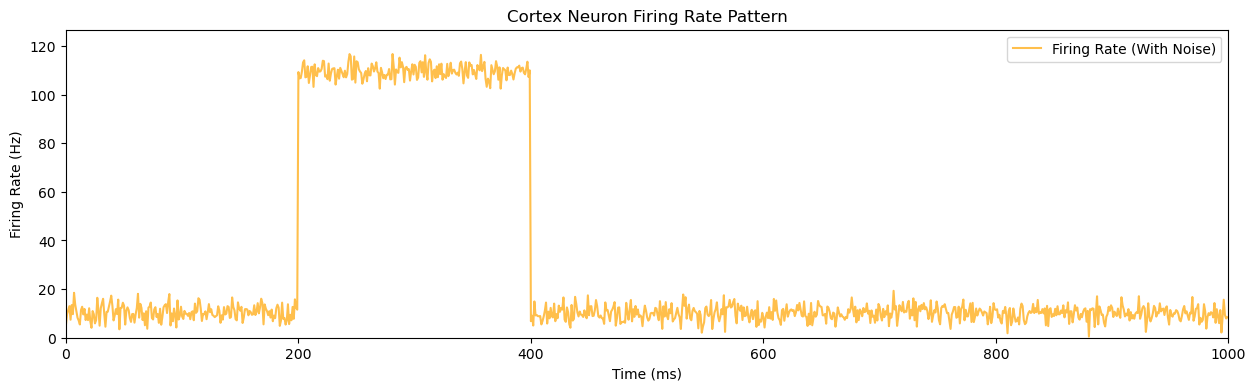

In [11]:
### various input current visualization (poisson)
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
duration = 1000  # Total duration in ms
time = np.arange(0, duration, 1)  # Time vector in ms
base_rate = 10  # Base rate in Hz
increase_rate = 100  # Increased rate during 200-400 ms
sigma = 3  # Standard deviation for noise

# Initialize the firing rates array
firing_rates = np.zeros_like(time, dtype=float)

# Define the input pattern
for t in range(len(time)):
    if 200 <= time[t] < 400:
        firing_rates[t] = base_rate + increase_rate  # 200 to 400 ms
    else:
        firing_rates[t] = base_rate  # Outside the interval

# Add noise to the firing rates
noise = np.random.normal(0, sigma, size=firing_rates.shape)
firing_rates_with_noise = firing_rates + noise

# Ensure firing rates are non-negative
firing_rates_with_noise[firing_rates_with_noise < 0] = 0

# Plot the firing rates
plt.figure(figsize=(15, 4))
# plt.plot(time, firing_rates, label='Firing Rate (Without Noise)', color='b', linewidth=2)
plt.plot(time, firing_rates_with_noise, label='Firing Rate (With Noise)', color='orange', alpha=0.7)
plt.xlabel('Time (ms)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Cortex Neuron Firing Rate Pattern')
plt.legend()
#plt.grid()
plt.xlim(0, duration)  # Set x-axis limits
plt.ylim(0, np.max(firing_rates_with_noise) + 10)  # Set y-axis limits
plt.show()


### Network Connection

WARNING    /var/folders/gc/ccxrs945073cqwbghj93h9wr0000gn/T/ipykernel_50940/2202741662.py:42: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrowstyle='->', arrowsize=15, width=2)
 [py.warnings]


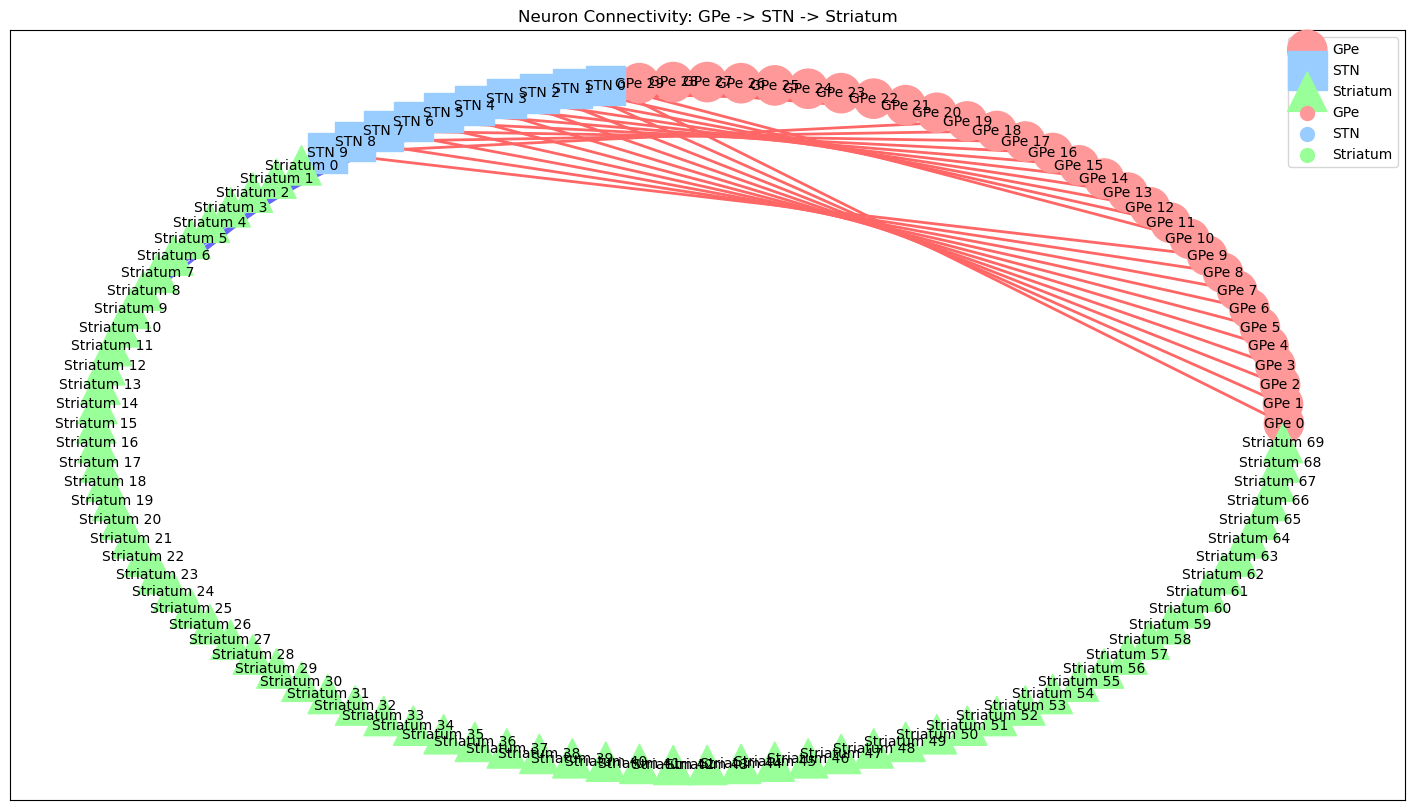

In [9]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_neuron_connections(results, N_GPe, N_STN, N_Striatum):

    plt.figure(figsize=(18, 10))

    G = nx.DiGraph()

    # Add nodes for each neuron group
    G.add_nodes_from(range(N_GPe), group='GPe')
    G.add_nodes_from(range(N_GPe, N_GPe + N_STN), group='STN')
    G.add_nodes_from(range(N_GPe + N_STN, N_GPe + N_STN + N_Striatum), group='Striatum')

    # Add edges 
    for i in range(N_GPe):
        G.add_edge(i, N_GPe + (i % N_STN))  # GPe to STN
    for i in range(N_STN):
        G.add_edge(N_GPe + i, N_GPe + N_STN + (i % N_Striatum))  # STN to Striatum

    # Circular layout to reduce overlap and improve aesthetics
    pos = nx.circular_layout(G)

    # Define node colors for different groups
    node_colors = ['#FF9999'] * N_GPe + ['#99CCFF'] * N_STN + ['#99FF99'] * N_Striatum

    # Define node shapes
    node_shapes = {
        'GPe': 'o',  
        'STN': 's', 
        'Striatum': '^'  
    }

    # Draw nodes with different colors and shapes
    for group, shape in node_shapes.items():
        group_indices = [n for n, d in G.nodes(data=True) if d['group'] == group]
        nx.draw_networkx_nodes(G, pos, nodelist=group_indices, node_color=[node_colors[i] for i in group_indices],
                               node_size=800, node_shape=shape, label=group)

    # Draw edges with different colors for connections between neuron groups
    edge_colors = ['#FF6666' if G.nodes[u]['group'] == 'GPe' else '#6666FF' for u, v in G.edges()]
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrowstyle='->', arrowsize=15, width=2)

    # Add labels
    labels = {i: f"GPe {i}" if i < N_GPe else f"STN {i - N_GPe}" if i < N_GPe + N_STN else f"Striatum {i - N_GPe - N_STN}" for i in range(N_GPe + N_STN + N_Striatum)}
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black')

    # Create a legend
    legend_labels = ['GPe', 'STN', 'Striatum']
    legend_colors = ['#FF9999', '#99CCFF', '#99FF99']
    for label, color in zip(legend_labels, legend_colors):
        plt.scatter([], [], c=color, label=label, s=100)
    plt.legend(loc='best')

    # Display the graph
    plt.title('Neuron Connectivity: GPe -> STN -> Striatum', fontsize=12)
    plt.gca().set_facecolor('white')  
    plt.show()


plot_neuron_connections(results1, N_GPe, N_STN, N_MSN)

### Firing rate bar plot

WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]


INFO       No numerical integration method specified for group 'synapses_5', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_6', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_7', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_8', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'synapses_9', using method 'exact' (took 0.00s). [brian2.stateupdaters.base.method_choice]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was given. [brian2.groups.neurongroup.no_refractory]
WARNING    Model equations use the "unless refractory" flag but no refractory keyword was g

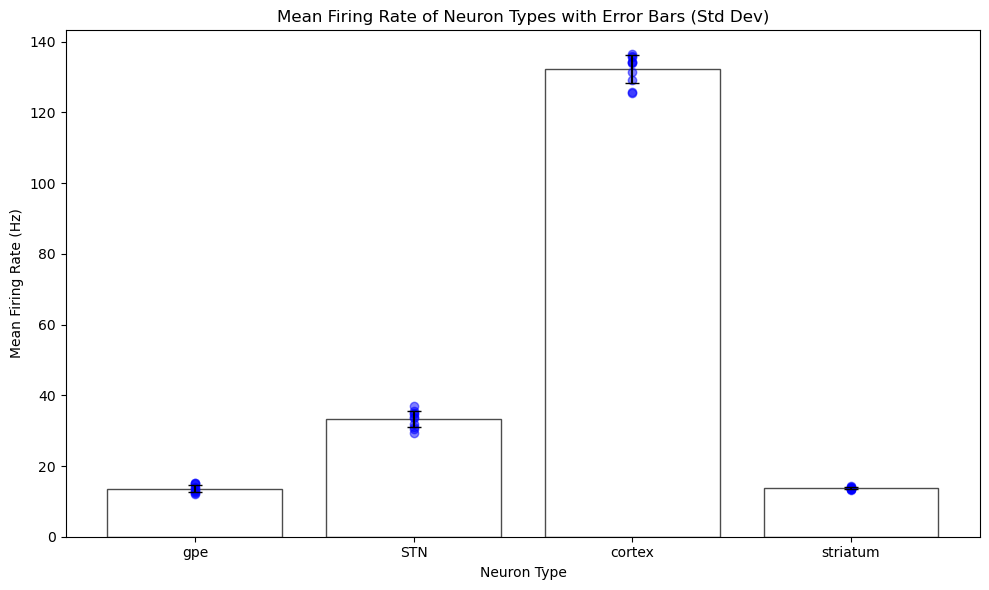

In [4]:
# Firing rate plot 
import numpy as np
import matplotlib.pyplot as plt
from simulation_runner_syn import run_simulation_with_inh_ext_input
from brian2 import *

n_neurons = 30  
n_simulations = 10  

# set list 
firing_rates_per_neuron = {
    'gpe': np.zeros(n_simulations),
    'STN': np.zeros(n_simulations),
    'cortex': np.zeros(n_simulations),
    'striatum': np.zeros(n_simulations)
}

gpe_params_file = './params_ref/GPe_T1_1.json'
stn_params_file = './params_ref/STN_1.json'
striatum_params_file = './params_ref/MSN_D2_1.json' 

synapse_params = {
    # STN - GPe (ext)
    'g0_n': 0.08*nS,
    'nmda_tau_syn': 100*ms,  
    'nmda_E_rev': 0*mV,
    'g0_a': 0.35*nS,
    'ampa_tau_syn': 12*ms,  
    'ampa_E_rev': 0*mV,
    
    # EXT - GPe
    'g0_g': 0.04*nS,
    'gaba_tau_syn': 87 * ms,
    'gaba_E_rev': -74* mV,
    
    # Cortex - EXT
    'cs_g0_n': 0.11 * nS,
    'cs_g0_a': 0.5 * nS,
    'cs_ampa_tau_syn': 12 * ms,
    'cs_nmda_tau_syn': 160 * ms,
    'cs_ampa_E_rev': 0 * mV,
    'cs_nmda_E_rev': 0 * mV,
    
    # Cortex - STN (excitatory connection)
    'csn_g0_n': 0.00625 * nS,
    'csn_g0_a': 0.25 * nS,
    'csn_ampa_tau_syn': 4 * ms,
    'csn_nmda_tau_syn': 160 * ms,
    'csn_ampa_E_rev': 0 * mV,
    'csn_nmda_E_rev': 0 * mV,
    
    # GPe - STN
    'gsn_g0_g': 0.08*nS,
    'gsn_gaba_tau_syn': 8 * ms,
    'gsn_gaba_E_rev': -84 * mV
}

N_GPe = 30 # 988
N_STN = 10 # 388
N_Striatum = 30 # 37971

# repeat simulation 
for i in range(n_simulations):
    results = run_simulation_with_inh_ext_input(  
        N_GPe, N_STN, N_Striatum, gpe_params_file, stn_params_file, striatum_params_file,
        synapse_params, 'GPe', 'STN', 'Striatum', "GPe_STN_inh_ext"
    )
    
    # 각 뉴런 타입의 firing rate 저장
    firing_rates_per_neuron['gpe'][i] = np.mean(results['firing_rates']['gpe'])  # 평균값으로 저장
    firing_rates_per_neuron['STN'][i] = np.mean(results['firing_rates']['STN'])  # 평균값으로 저장
    firing_rates_per_neuron['cortex'][i] = np.mean(results['firing_rates']['cortex'])  # 평균값으로 저장
    firing_rates_per_neuron['striatum'][i] = np.mean(results['firing_rates']['striatum'])  # 평균값으로 저장

# mean & variance 
mean_firing_rates = {key: np.mean(firing_rates_per_neuron[key]) for key in firing_rates_per_neuron}
std_firing_rates = {key: np.std(firing_rates_per_neuron[key]) for key in firing_rates_per_neuron}

# visualization 
plt.figure(figsize=(10, 6))
x = np.arange(len(mean_firing_rates)) 
labels = list(mean_firing_rates.keys()) 

bars = plt.bar(x, mean_firing_rates.values(), yerr=std_firing_rates.values(), 
               capsize = 5, edgecolor = 'black', fill = False, alpha = 0.7)

for idx, (key, rates) in enumerate(firing_rates_per_neuron.items()):
    plt.scatter([idx] * n_simulations, rates, color='blue', alpha=0.5, label=f'{key} Spike Rates')

"""
for i in range(len(labels)):
    plt.text(i, mean_firing_rates[labels[i]] + std_firing_rates[labels[i]] + 0.1, 
             f'{mean_firing_rates[labels[i]]:.2f}', ha='center')
"""

plt.xlabel('Neuron Type')
plt.ylabel('Mean Firing Rate (Hz)')
plt.title('Mean Firing Rate of Neuron Types with Error Bars (Std Dev)')
plt.xticks(x, labels) 
plt.tight_layout()
plt.show()